In [5]:
import pandas as pd
import numpy as np


In [4]:
from google.colab import files
files.upload()

Saving fortune500.xlsx to fortune500.xlsx


{'fortune500.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xebz\xd2\x93b\x01\x00\x00\x90\x04\x00\x00\x13\x00\xdc\x01[Content_Types].xml \xa2\xd8\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [6]:
df = pd.read_excel("/content/fortune500.xlsx")

In [7]:
df.describe()

,Year,Rank,Revenue (in millions)
count,29500.000000,29500.000000,29500.000000
mean,1983.728814,284.397966,5237.162102
std,16.616417,191.401503,14335.344473
min,1955.000000,1.000000,49.700000
25%,1969.000000,135.000000,443.275000
50%,1984.000000,269.000000,1498.050000
75%,1999.000000,403.000000,4607.825000
max,2009.000000,1000.000000,442851.000000


In [8]:
df.isnull().sum()

,0
Year,0
Rank,0
Company,0
Revenue (in millions),0
Profit (in millions),0


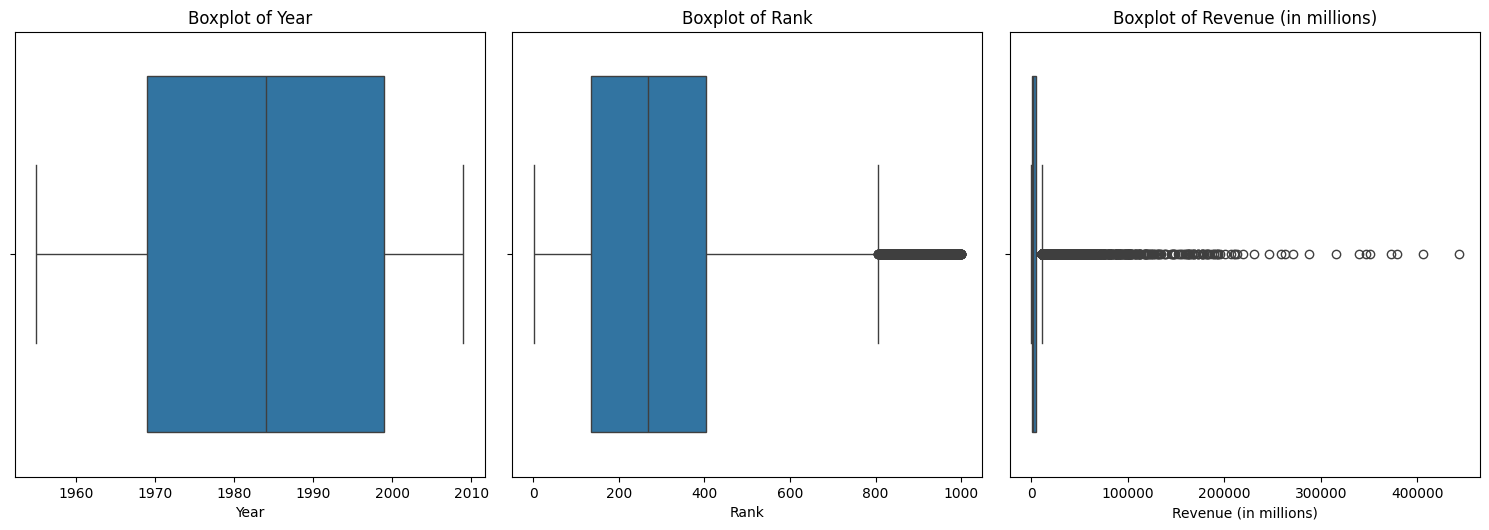

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Adjust the number of columns as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [10]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [11]:
Q1 = df['Revenue (in millions)'].quantile(0.25)
Q3 = df['Revenue (in millions)'].quantile(0.75)
IQR = Q3 - Q1

# Step 4: Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Filter the DataFrame to remove outliers
df_filtered = df[(df['Revenue (in millions)'] >= lower_bound) & (df['Revenue (in millions)'] <= upper_bound)]


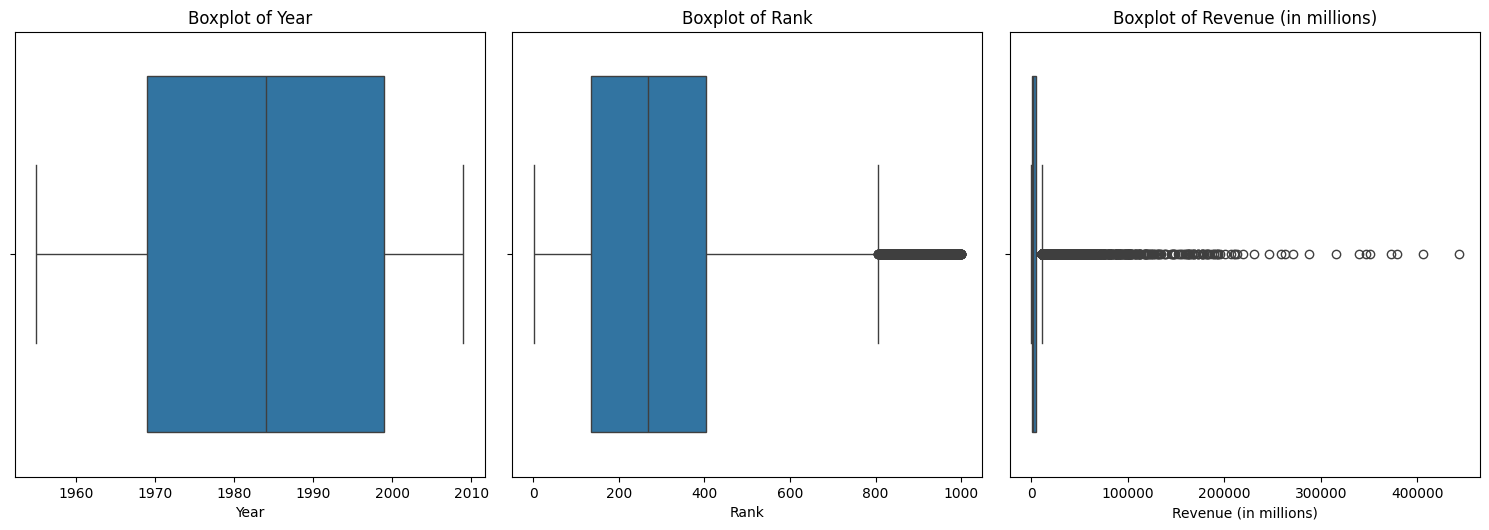

In [12]:
numerical_cols = df.select_dtypes(include=['number']).columns
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Adjust the number of columns as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [16]:
Q1 = df['Revenue (in millions)'].quantile(0.25)
Q3 = df['Revenue (in millions)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Revenue (in millions)'] < lower_bound) | (df['Revenue (in millions)'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers['Revenue (in millions)'].tolist()}")
print(f"Outliers: {outliers['Revenue (in millions)'].count()}")

Q1: 443.275, Q3: 4607.825, IQR: 4164.55
Lower Bound: -5803.550000000001, Upper Bound: 10854.650000000001
Outliers: [12443.3, 10989.8, 11233.1, 12736.0, 11395.9, 14640.2, 16494.8, 16997.0, 20734.0, 11536.8, 11471.5, 20208.5, 12240.0, 12191.4, 20026.3, 13266.0, 22755.4, 14091.3, 14075.1, 24295.1, 14929.8, 14755.6, 18752.4, 16554.2, 14979.9, 28263.9, 18700.6, 16433.0, 30435.2, 20309.8, 20194.4, 35798.3, 25724.3, 23015.1, 11774.4, 11575.3, 11406.9, 11390.1, 10993.2, 42061.3, 31549.5, 23620.6, 23255.5, 18929.0, 17191.2, 16458.0, 13413.1, 12675.3, 11154.4, 10971.4, 44864.8, 35724.9, 24507.5, 24009.1, 20620.4, 16822.1, 14436.5, 14268.0, 13399.1, 11699.3, 11367.6, 48630.8, 47181.0, 28839.6, 26451.9, 26062.6, 19434.1, 16451.0, 16304.3, 15697.3, 15537.8, 11764.1, 11532.0, 54961.3, 54126.2, 37841.5, 32125.8, 27920.5, 20917.3, 18133.2, 17840.0, 17518.6, 16708.3, 13145.7, 13019.9, 10969.1, 63221.1, 60334.5, 42784.1, 34736.0, 28607.5, 23232.4, 21076.1, 19653.8, 18069.0, 16340.7, 15261.2, 14961.5, 12

In [21]:
df = df[(df['Revenue (in millions)'] >= lower_bound) & (df['Revenue (in millions)'] <= upper_bound)]


Cleaned DataFrame (without outliers):
       Year  Rank           Company  Revenue (in millions)  \
0      1955     1    General Motors                 9823.5   
1      1955     2       Exxon Mobil                 5661.4   
2      1955     3        U.S. Steel                 3250.4   
3      1955     4  General Electric                 2959.1   
4      1955     5            Esmark                 2510.8   
...     ...   ...               ...                    ...   
29495  2009   996           Tellabs                 1729.0   
29496  2009   997       Administaff                 1724.4   
29497  2009   998   Sanderson Farms                 1723.6   
29498  2009   999   MGIC Investment                 1721.5   
29499  2009  1000  Career Education                 1720.8   

      Profit (in millions)  
0                      806  
1                    584.8  
2                    195.4  
3                    212.6  
4                     19.1  
...                    ...  
29495        

In [22]:
outliers = df[(df['Revenue (in millions)'] < lower_bound) | (df['Revenue (in millions)'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers['Revenue (in millions)'].tolist()}")
print(f"Outliers: {outliers['Revenue (in millions)'].count()}")

Q1: 443.275, Q3: 4607.825, IQR: 4164.55
Lower Bound: -5803.550000000001, Upper Bound: 10854.650000000001
Outliers: []
Outliers: 0


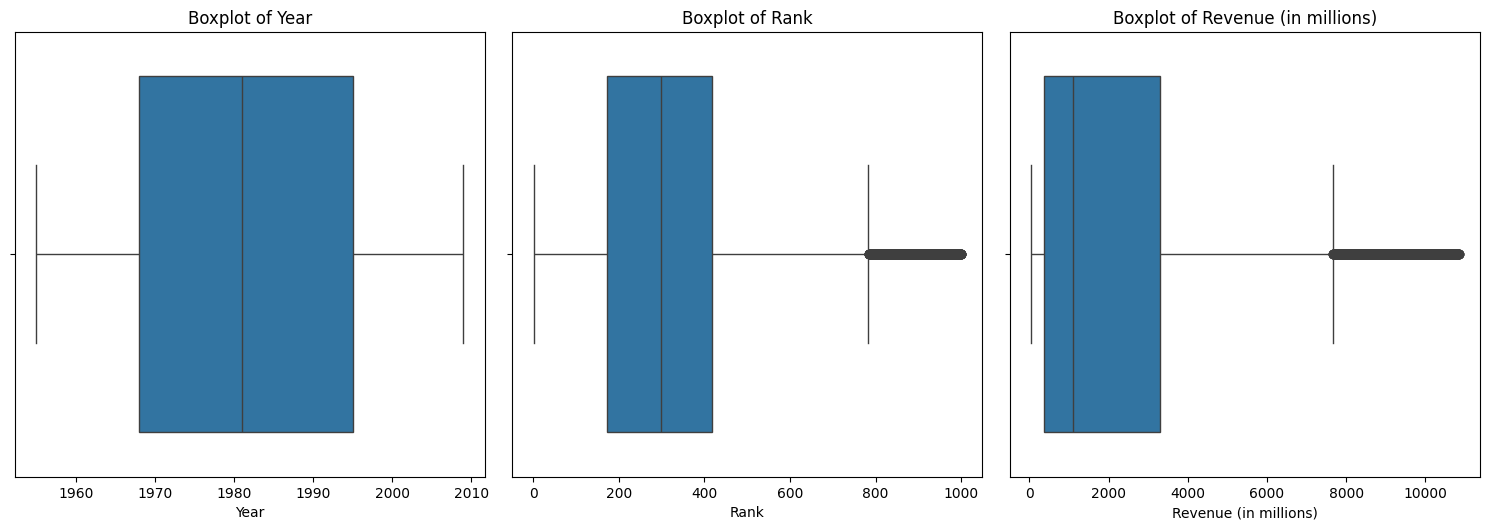

In [23]:
numerical_cols = df.select_dtypes(include=['number']).columns
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Adjust the number of columns as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26275 entries, 0 to 29499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   26275 non-null  int64  
 1   Rank                   26275 non-null  int64  
 2   Company                26275 non-null  object 
 3   Revenue (in millions)  26275 non-null  float64
 4   Profit (in millions)   26275 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [25]:
df.describe()

,Year,Rank,Revenue (in millions)
count,26275.000000,26275.000000,26275.000000
mean,1981.740209,309.475623,2192.523357
std,16.293028,186.832694,2466.174011
min,1955.000000,1.000000,49.700000
25%,1968.000000,173.000000,377.200000
50%,1981.000000,298.000000,1090.200000
75%,1995.000000,417.000000,3293.800000
max,2009.000000,1000.000000,10843.200000
